In [36]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import input_data


%matplotlib inline



In [4]:
mnist = input_data.read_data_sets(train_dir='.')

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting .\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting .\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting .\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting .\t10k-labels-idx1-ubyte.gz


In [9]:
mnist.train.images[0].shape

(784,)

In [49]:
def plot_single_number(image_array):
    """
    image_array is the array that represents a
    single mnist image. it has shape (784, )
    and needs to be reshaped.
    """
    X = image_array
    X = X.reshape([28, 28]);
    plt.gray()
    plt.axis('off')
    plt.imshow(X)
    plt.show()

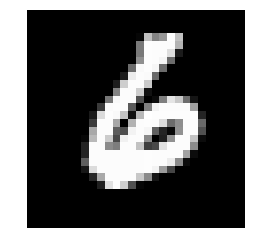

In [50]:
plot_single_number(mnist.train.images[99])

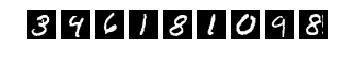

In [51]:
fig = plt.figure()

for i in range(1, 10):
    ax = fig.add_subplot(1, 10, i)
    X = mnist.train.images[i]
    X = X.reshape([28, 28])
    ax.axis('off')
    ax.imshow(X)
